#Exercise




Predict bike rental count (daily) based on the environmental & seasonal settings. This dataset contains the daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. 




Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. 




Conduct the DNN analysis and improve the performance of the model using different archictecture. 




Columns Details:

1. Instant - Record Index

2. dteday - Date (Format: YYYY-MM-DD)

3. season - Season (1:   springer, 2: summer, 3: fall, 4: winter)

4. yr - Year (0: 2011,   1:2012)

5. mnth - Month (1 to 12)

6. holiday - Weather day is holiday or not

7. weekday - Day of the week

8. workingday - Working Day: If day is neither weekend nor holiday is 1, otherwise is 0

9. weathersit - Weather Situation (1: Clear/Few clouds; 2: Mist/Cloudy; 3: Light Snow/Light Rain; 4: Heavy Rain/Ice Pallets/Thunderstorm/Snow)

10. temp - Normalized temperature in Celsius. 

11. atemp - Normalized feeling temperature in Celsius. 

12. hum - Normalized humidity. 

13. windspeed - Normalized wind speed. 

14. casual - Count of casual users

15. registered - Count of registered users

16. cnt - Count of total rental bikes including both casual and registered

In [1]:
#Mounting our Drive to Google Colab
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#Dataset for classification
path = '/drive/MyDrive/Colab Notebooks/bike.csv'

df = pd.read_csv(path)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
# Get count of unique values for all columns in the dataframe
unique_counts = df.nunique()

# Print the count of unique values for all columns
print(unique_counts)

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


# **Instant and Day are no use to the dataset. Will drop both features.**

In [5]:
# Drop two specific columns from the dataframe
df = df.drop(['instant', 'dteday'], axis=1)

In [6]:
df.shape

(731, 14)

In [7]:
#Splitting X and Y
X = df.drop('cnt',axis = 1)
Y = df['cnt']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,
                                                    random_state = 0)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("test shape", X_test.shape)
print("test shape", y_test.shape)

X_train shape (584, 13)
y_train shape (584,)
test shape (147, 13)
test shape (147,)


In [9]:
# #Normalization (Not required since Wifi dataset are quite similar across differnet features)
# #Neural network can do normalisation such as SGD model, but can choose not to normalise for other models
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train) #fit transform on train  (to get mean and stadard deviation)
# X_test = scaler.transform(X_test) #only transform on test (to use info from train)

# **Normalisation has worsen the performance of the model.**

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout #Dense = linear equation (NN uses linear equation)
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

In [21]:
#Building the base model
L1 = 50
L2 = 50
L3 = 50

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu')) #input_dim is the total of input variable
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))


#output layer
model.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

In [22]:
#Compile the sequential model
model.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

In [23]:
#Training the model
history = model.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
12/12 [==============================] - 1s 13ms/step - loss: 13223320.0000 - mae: 3286.5339 - val_loss: 6112377.0000 - val_mae: 2221.3206
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 2523598.7500 - mae: 1321.9961 - val_loss: 334607.4062 - val_mae: 422.1680
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 131096.4375 - mae: 245.8746 - val_loss: 66807.3672 - val_mae: 194.7047
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 41457.7930 - mae: 153.1157 - val_loss: 21282.7168 - val_mae: 104.2254
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 10532.4668 - mae: 78.5723 - val_loss: 9074.7090 - val_mae: 81.6705
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 18208.8027 - mae: 106.5630 - val_loss: 24665.7656 - val_mae: 136.4953
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 12615.8926 - mae: 81.5783 - val_loss: 45149.3594 - val_mae:

<Figure size 640x480 with 0 Axes>

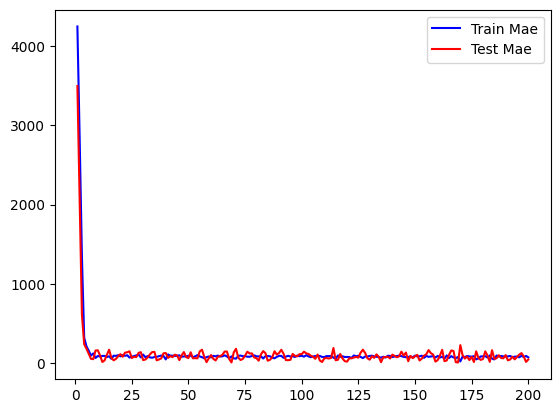

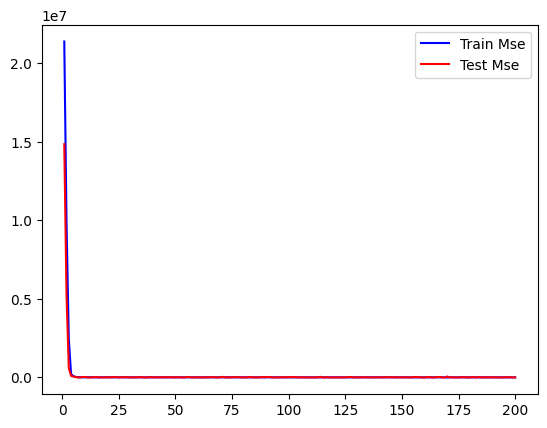

<Figure size 640x480 with 0 Axes>

In [14]:
#Visualisation of Base model
import pandas as pd
import matplotlib.pyplot as plt
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(mae)+1)

plt.plot(epochs , mae,'b', label = 'Train Mae')
plt.plot (epochs, val_mae, 'r', label = 'Test Mae')
plt.legend()
plt.figure()

plt.plot(epochs , loss,'b', label = 'Train Mse')
plt.plot (epochs, val_loss, 'r', label = 'Test Mse')
plt.legend()
plt.figure()

In [24]:
#Increase model complexity
L1 = 50
L2 = 50
L3 = 50

model2 = Sequential()
model2.add(Dense(L1, input_dim = 13, activation = 'relu')) #input_dim is the total of input variable
model2.add(Dense(L2, activation = 'relu'))
model2.add(Dense(L3, activation = 'relu'))


#output layer
model2.add(Dense(1, activation='selu')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model2.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

#Training the model
history2 = model2.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
12/12 [==============================] - 1s 20ms/step - loss: 7962414.5000 - mae: 2466.7898 - val_loss: 1574129.2500 - val_mae: 1108.2935
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 433587.4688 - mae: 477.4634 - val_loss: 77169.4297 - val_mae: 189.4958
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 57220.8516 - mae: 176.2294 - val_loss: 49787.3008 - val_mae: 161.8891
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 33832.3633 - mae: 136.7073 - val_loss: 25652.3906 - val_mae: 135.1304
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 14094.6406 - mae: 89.9036 - val_loss: 5807.0151 - val_mae: 63.9838
Epoch 6/200
12/12 [==============================] - 0s 4ms/step - loss: 22955.1289 - mae: 119.6180 - val_loss: 5912.6128 - val_mae: 68.2506
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 22395.2852 - mae: 124.7175 - val_loss: 35860.6250 - val_mae: 173.9

# **Change output activation from Linear to Selu show improvement on loss**

In [27]:
#Increase model complexity 2
L1 = 50
L2 = 50
L3 = 50
model3 = Sequential()
model3.add(Dense(L1, input_dim = 13, activation = 'selu')) #input_dim is the total of input variable
model3.add(Dense(L2, activation = 'selu'))
model3.add(Dense(L3, activation = 'selu'))


#output layer
model3.add(Dense(1, activation='selu')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model3.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

#Training the model
history3 = model3.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
12/12 [==============================] - 1s 20ms/step - loss: 23843432.0000 - mae: 4497.0459 - val_loss: 24883862.0000 - val_mae: 4542.1055
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 18404828.0000 - mae: 3872.3325 - val_loss: 6804950.0000 - val_mae: 2330.7214
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 2707386.0000 - mae: 1309.9867 - val_loss: 510081.3750 - val_mae: 467.6758
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 252380.6094 - mae: 337.7197 - val_loss: 176311.9375 - val_mae: 306.3210
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 104345.3984 - mae: 223.4161 - val_loss: 62371.5586 - val_mae: 149.2028
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 31407.3184 - mae: 119.2062 - val_loss: 17264.9824 - val_mae: 77.5030
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 27037.7344 - mae: 128.5780 - val_loss: 21864.49

# **Changed all activation to Selu shows no apparent improvement on the model.**

In [26]:
#Increase model complexity 3
L1 = 50
L2 = 50
L3 = 50
model4 = Sequential()
model4.add(Dense(L1, input_dim = 13, activation = 'selu')) #input_dim is the total of input variable
model4.add(Dense(L2, activation = 'selu'))
model4.add(Dense(L3, activation = 'selu'))


#output layer
model4.add(Dense(1, activation='selu')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model4.compile(loss='mse', metrics ='mae',optimizer ='adam')

#Training the model
history4 = model4.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
12/12 [==============================] - 1s 13ms/step - loss: 23843430.0000 - mae: 4497.0454 - val_loss: 24883862.0000 - val_mae: 4542.1055
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 23388068.0000 - mae: 4452.3877 - val_loss: 21077314.0000 - val_mae: 4172.2319
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 14811687.0000 - mae: 3507.3330 - val_loss: 8760905.0000 - val_mae: 2660.7268
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 3957583.0000 - mae: 1632.8000 - val_loss: 329296.5000 - val_mae: 366.9876
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 609972.7500 - mae: 629.9930 - val_loss: 562205.5625 - val_mae: 620.9726
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 222215.6875 - mae: 360.7078 - val_loss: 202209.2188 - val_mae: 306.8821
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 133567.8906 - mae: 250.1388 - val_los

<Figure size 640x480 with 0 Axes>

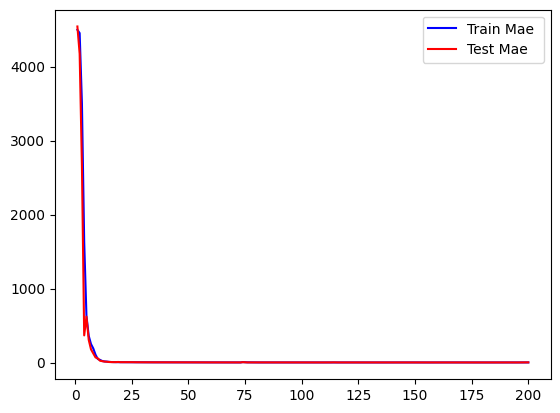

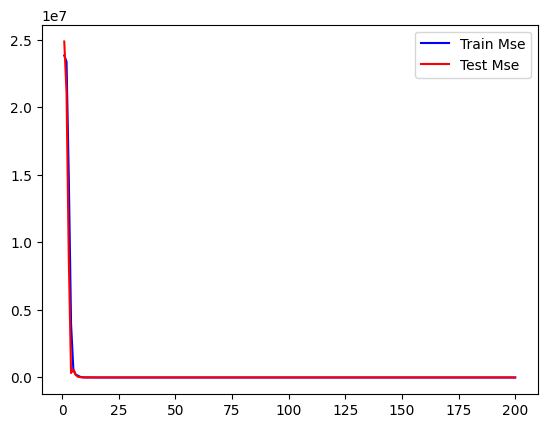

<Figure size 640x480 with 0 Axes>

In [28]:
#Visualisation of L2 Regularization & Dropout model
mae4 = history4.history['mae']
val_mae4 = history4.history['val_mae']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(1,len(mae4)+1)

plt.plot(epochs , mae4,'b', label = 'Train Mae ')
plt.plot (epochs, val_mae4, 'r', label = 'Test Mae')
plt.legend()
plt.figure()

plt.plot(epochs , loss4,'b', label = 'Train Mse')
plt.plot (epochs, val_loss4, 'r', label = 'Test Mse')
plt.legend()
plt.figure()

# **Significant improvement noted on the performance of the model after changing optimizer to Adam. But noted overfitting issue**




In [31]:
#Improve model architecture - resolve overfitting (Ridge)
L1 = 50
L2 = 50
L3 = 50
model5 = Sequential()
model5.add(Dense(L1, input_dim = 13, activation = 'selu',
                 kernel_initializer = 'he_normal',
                  kernel_regularizer = regularizers.l2(0.01))) #input_dim is the total of input variable
model5.add(Dense(L2, activation = 'selu'))
model5.add(Dense(L3, activation = 'selu'))


#output layer
model5.add(Dense(1, activation='selu')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model5.compile(loss='mse', metrics ='mae',optimizer ='adam')

#Training the model
history5 = model5.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
12/12 [==============================] - 1s 22ms/step - loss: 14312126.0000 - mae: 3401.9197 - val_loss: 4944695.0000 - val_mae: 1968.6324
Epoch 2/200
12/12 [==============================] - 0s 7ms/step - loss: 1668332.5000 - mae: 962.2023 - val_loss: 652494.3125 - val_mae: 699.9339
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 813652.5000 - mae: 783.6543 - val_loss: 472663.8438 - val_mae: 593.6511
Epoch 4/200
12/12 [==============================] - 0s 7ms/step - loss: 288097.6250 - mae: 404.1158 - val_loss: 231528.1406 - val_mae: 307.9668
Epoch 5/200
12/12 [==============================] - 0s 8ms/step - loss: 141962.4688 - mae: 278.4293 - val_loss: 104697.8906 - val_mae: 266.5346
Epoch 6/200
12/12 [==============================] - 0s 10ms/step - loss: 53769.1016 - mae: 175.1402 - val_loss: 15088.9170 - val_mae: 93.7388
Epoch 7/200
12/12 [==============================] - 0s 8ms/step - loss: 6275.4624 - mae: 59.7018 - val_loss: 1338.8779 - val

# **RIDE Regularizer reduced gap of overfitting.**

<Figure size 640x480 with 0 Axes>

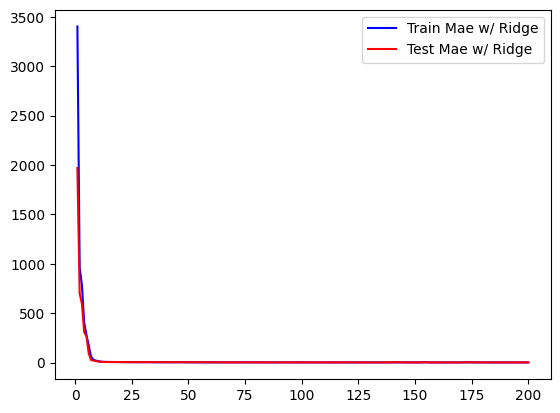

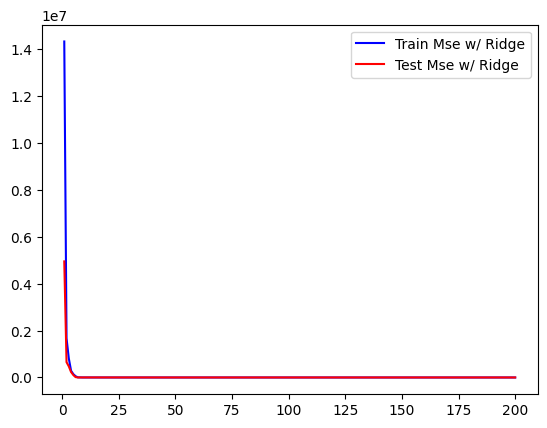

<Figure size 640x480 with 0 Axes>

In [33]:
#Visualisation of L2 Regularization & Dropout & Early Stopping model
mae5 = history5.history['mae']
val_mae5 = history5.history['val_mae']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

epochs = range(1,len(mae5)+1)

plt.plot(epochs , mae5,'b', label = 'Train Mae w/ Ridge')
plt.plot (epochs, val_mae5, 'r', label = 'Test Mae w/ Ridge')
plt.legend()
plt.figure()

plt.plot(epochs , loss5,'b', label = 'Train Mse w/ Ridge')
plt.plot (epochs, val_loss5, 'r', label = 'Test Mse w/ Ridge')
plt.legend()
plt.figure()

In [35]:
#Improve model architecture - resolve overfitting (Ridge + Dropout)
L1 = 50
L2 = 50
L3 = 50
model6 = Sequential()
model6.add(Dense(L1, input_dim = 13, activation = 'selu',
                 kernel_initializer = 'he_normal',
                  kernel_regularizer = regularizers.l2(0.01))) #input_dim is the total of input variable
model6.add(Dense(L2, activation = 'selu'))
model6.add(Dense(L3, activation = 'selu'))
model6.add(Dropout(rate=0.2))


#output layer
model6.add(Dense(1, activation='selu')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model6.compile(loss='mse', metrics ='mae',optimizer ='adam')

#Training the model
history6 = model6.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
12/12 [==============================] - 1s 14ms/step - loss: 16820188.0000 - mae: 3672.2568 - val_loss: 6535907.5000 - val_mae: 2256.3750
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 3040524.0000 - mae: 1302.9146 - val_loss: 308880.3438 - val_mae: 464.7108
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 1639806.8750 - mae: 979.6738 - val_loss: 203957.8750 - val_mae: 376.7537
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 1001213.0625 - mae: 739.4507 - val_loss: 264591.0312 - val_mae: 425.9010
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 933386.3125 - mae: 704.9409 - val_loss: 59206.0195 - val_mae: 204.9086
Epoch 6/200
12/12 [==============================] - 0s 4ms/step - loss: 869810.4375 - mae: 672.0096 - val_loss: 19193.3906 - val_mae: 112.4135
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 793428.4375 - mae: 646.2095 - val_loss: 23383.441

<Figure size 640x480 with 0 Axes>

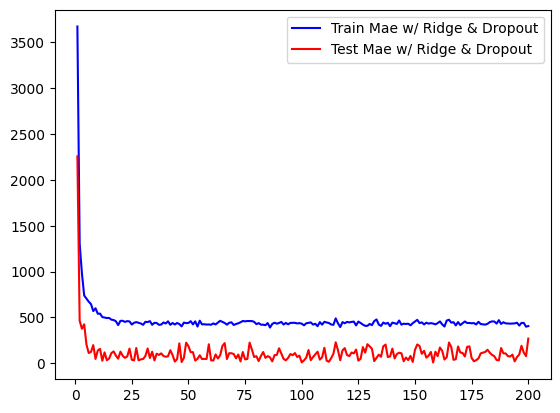

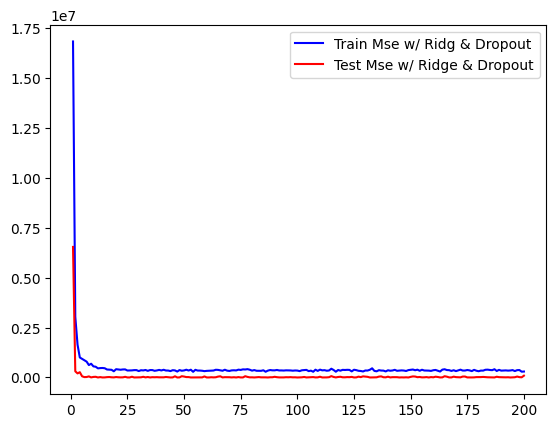

<Figure size 640x480 with 0 Axes>

In [37]:
#Visualisation of L2 Regularization & Dropout
mae6 = history6.history['mae']
val_mae6 = history6.history['val_mae']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']

epochs = range(1,len(mae6)+1)

plt.plot(epochs , mae6,'b', label = 'Train Mae w/ Ridge & Dropout')
plt.plot (epochs, val_mae6, 'r', label = 'Test Mae w/ Ridge & Dropout')
plt.legend()
plt.figure()

plt.plot(epochs , loss6,'b', label = 'Train Mse w/ Ridg & Dropout')
plt.plot (epochs, val_loss6, 'r', label = 'Test Mse w/ Ridge & Dropout')
plt.legend()
plt.figure()

# **Dropout is not suitable for this model as it worsen the results.**

# **Will perform a grid search on optimal parameters with the architecture of:**
**1. 2 hidden layers**

**2. L2 Regularization**

**3. optimizer = Adam**

**4. activation = selu**


In [29]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

In [38]:
#Function to create model, required for Keras Regressor
def create_model(neuron1 = 50, neuron2 = 50,neuron3 = 50):

  model = Sequential()
  model.add(Dense(neuron1, input_dim = 13, activation ='selu',
                  kernel_initializer = 'he_normal',
                  kernel_regularizer = regularizers.l2(0.01)))
  model.add(Dense(neuron2, activation = 'selu'))
  model.add(Dense(neuron3, activation = 'selu'))
  model.add(Dense(1, activation = 'selu'))

  #Compile Model
  model.compile(loss = 'mse',
                optimizer = 'adam', metrics = 'mae')
  return model

In [39]:
#Create model
model = KerasRegressor(model=create_model,
                        verbose = 0)

#define the grid search parameters
neuron = [50,100,150]
neuron2 = [50,100,150]
neuron3 = [50,100,150]

param_grid = dict(batch_size = [100], epochs = [200],model__neuron1 = neuron, model__neuron2 = neuron2, model__neuron3 = neuron3)
grid = GridSearchCV(estimator = model,
                    param_grid=param_grid,
                    n_jobs = -1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [40]:
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds,params):
  print("%f (%f) with: %r" % (mean,stdev,param))

Best: 0.999999 using {'batch_size': 100, 'epochs': 200, 'model__neuron1': 150, 'model__neuron2': 150, 'model__neuron3': 150}
0.999995 (0.000002) with: {'batch_size': 100, 'epochs': 200, 'model__neuron1': 50, 'model__neuron2': 50, 'model__neuron3': 50}
0.999996 (0.000003) with: {'batch_size': 100, 'epochs': 200, 'model__neuron1': 50, 'model__neuron2': 50, 'model__neuron3': 100}
0.999993 (0.000006) with: {'batch_size': 100, 'epochs': 200, 'model__neuron1': 50, 'model__neuron2': 50, 'model__neuron3': 150}
0.999950 (0.000069) with: {'batch_size': 100, 'epochs': 200, 'model__neuron1': 50, 'model__neuron2': 100, 'model__neuron3': 50}
0.999997 (0.000000) with: {'batch_size': 100, 'epochs': 200, 'model__neuron1': 50, 'model__neuron2': 100, 'model__neuron3': 100}
0.999997 (0.000002) with: {'batch_size': 100, 'epochs': 200, 'model__neuron1': 50, 'model__neuron2': 100, 'model__neuron3': 150}
-1.086946 (2.951385) with: {'batch_size': 100, 'epochs': 200, 'model__neuron1': 50, 'model__neuron2': 150,

In [41]:
#Final Model
L1 = 150
L2 = 150
L3 = 150
model_f = Sequential()
model_f.add(Dense(L1, input_dim = 13, activation = 'selu',
                 kernel_initializer = 'he_normal',
                  kernel_regularizer = regularizers.l2(0.01))) #input_dim is the total of input variable
model_f.add(Dense(L2, activation = 'selu'))
model_f.add(Dense(L3, activation = 'selu'))


#output layer
model_f.add(Dense(1, activation='selu')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model_f.compile(loss='mse', metrics ='mae',optimizer ='adam')

#Training the model
history_f = model_f.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
12/12 [==============================] - 1s 16ms/step - loss: 1973540.8750 - mae: 1034.4320 - val_loss: 443659.2188 - val_mae: 562.8613
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 295791.8750 - mae: 430.6912 - val_loss: 192337.2812 - val_mae: 382.9535
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 61313.5430 - mae: 197.2473 - val_loss: 2012.1331 - val_mae: 34.6836
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 8391.3809 - mae: 75.7457 - val_loss: 1888.4043 - val_mae: 34.1146
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 1365.3057 - mae: 25.8631 - val_loss: 743.0358 - val_mae: 21.5802
Epoch 6/200
12/12 [==============================] - 0s 4ms/step - loss: 379.5430 - mae: 15.0055 - val_loss: 122.4650 - val_mae: 7.3837
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 194.8119 - mae: 10.7331 - val_loss: 87.0150 - val_mae: 6.3050
Epoch 8/200
12/12 

<Figure size 640x480 with 0 Axes>

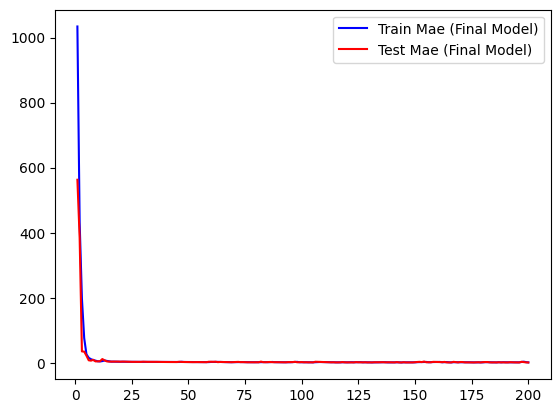

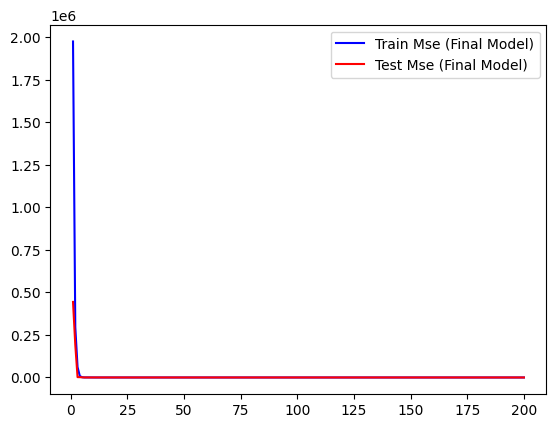

<Figure size 640x480 with 0 Axes>

In [42]:
#Visualisation of Final Model
mae_f = history_f.history['mae']
val_mae_f = history_f.history['val_mae']
loss_f = history_f.history['loss']
val_loss_f = history_f.history['val_loss']

epochs = range(1,len(mae_f)+1)

plt.plot(epochs , mae_f,'b', label = 'Train Mae (Final Model)')
plt.plot (epochs, val_mae_f, 'r', label = 'Test Mae (Final Model)')
plt.legend()
plt.figure()

plt.plot(epochs , loss_f,'b', label = 'Train Mse (Final Model)')
plt.plot (epochs, val_loss_f, 'r', label = 'Test Mse (Final Model)')
plt.legend()
plt.figure()

# **Final Model yields a loss of 3.3529 for training dataset and 2.6563 for testing dataset after model tuning.**